<a href="https://colab.research.google.com/github/Hameedhullah/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression - Binary Classification

In [ ]:
!pip install autoviz

In [43]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing the data

soc_net = pd.read_csv("Social_Network_Ads.csv")
soc_net.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male  19        19000           0    
1  15810944    Male  35        20000           0    
2  15668575  Female  26        43000           0    
3  15603246  Female  27        57000           0    
4  15804002    Male  19        76000           0

In [ ]:
# Profile of the data

soc_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
# Null Values

soc_net.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# Duplicated Values

soc_net.duplicated().sum()

0

In [ ]:
# Unique value in the data

soc_net.nunique().sort_values(ascending=True)

Gender               2
Purchased            2
Age                 43
EstimatedSalary    117
User ID            400
dtype: int64

In [ ]:
# List of unique value in column

for i in soc_net.columns:
  print(f'Unique value in {i}:')
  print(soc_net[i].unique(),'\n')

Unique value in User ID:
[15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829
 15600575 15727311 15570769 15606274 15746139 15704987 15628972 15697686
 15733883 15617482 15704583 15621083 15649487 15736760 15714658 15599081
 15705113 15631159 15792818 15633531 15744529 15669656 15581198 15729054
 15573452 15776733 15724858 15713144 15690188 15689425 15671766 15782806
 15764419 15591915 15772798 15792008 15715541 15639277 15798850 15776348
 15727696 15793813 15694395 15764195 15744919 15671655 15654901 15649136
 15775562 15807481 15642885 15789109 15814004 15673619 15595135 15583681
 15605000 15718071 15679760 15654574 15577178 15595324 15756932 15726358
 15595228 15782530 15592877 15651983 15746737 15774179 15667265 15655123
 15595917 15668385 15709476 15711218 15798659 15663939 15694946 15631912
 15768816 15682268 15684801 15636428 15809823 15699284 15786993 15709441
 15710257 15582492 15575694 15756820 15766289 15593014 15584545 15675949
 15672091 15801658 1570618

In [ ]:
# Statistical Analysis

soc_net.describe(include = 'all').T

count  unique   top   freq      mean           std       \
User ID          400.0   NaN      NaN  NaN  15691539.7575  71658.321581   
Gender             400     2   Female  204            NaN           NaN   
Age              400.0   NaN      NaN  NaN         37.655     10.482877   
EstimatedSalary  400.0   NaN      NaN  NaN        69742.5  34096.960282   
Purchased        400.0   NaN      NaN  NaN         0.3575      0.479864   

                    min         25%          50%         75%         max      
User ID          15566689.0  15626763.75  15694341.5  15750363.0  15815236.0  
Gender                  NaN          NaN         NaN         NaN         NaN  
Age                    18.0        29.75        37.0        46.0        60.0  
EstimatedSalary     15000.0      43000.0     70000.0     88000.0    150000.0  
Purchased               0.0          0.0         0.0         1.0         1.0

In [ ]:
# Graphical Analysis

autoviz_report = AV.AutoViz('Social_Network_Ads.csv')

Shape of your Data Set loaded: (400, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['User ID']
To fix these data quality issues in the dataset, import Fix

Number of All Scatter Plots = 3
All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
# checking the distribution of 'EstimatedSalary'

plt.figure(figsize=(10,5))
sns.histplot(soc_net['EstimatedSalary'])
plt.show()

In [ ]:
# checking the distribution of 'Age'

plt.figure(figsize=(10,5))
sns.histplot(soc_net['Age'])
plt.show()

In [ ]:
# Gender Distribution
sns.barplot(x=soc_net['Gender'].value_counts().index,
            y=soc_net['Gender'].value_counts().values)
plt.show()

In [ ]:
# Purchased Distribution

sns.barplot(x=soc_net['Purchased'].value_counts().index,
            y=soc_net['Purchased'].value_counts().values)
plt.show()

In [ ]:
# Scatterplot

plt.figure(figsize=(10,6))
sns.scatterplot(data=soc_net, x='Age', y='Purchased', hue='Gender')
plt.show()

In [ ]:
# Scatterplot

plt.figure(figsize=(10,6))
sns.scatterplot(data=soc_net, x='EstimatedSalary', y='Purchased', hue='Gender')
plt.show()

In [ ]:
# Preprocessing
# Drop the column of 'User ID'

soc_net.drop(columns = ['User ID'],inplace = True)
soc_net.shape

(400, 4)

In [ ]:
# data types

soc_net.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
# Categorical value converting to numeric way of category

def ordinal_encoder(soc_net, feats):
    for feat in feats:
        feat_val = list(np.arange(soc_net[feat].nunique()))
        feat_key = list(soc_net[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        soc_net[feat] = soc_net[feat].map(feat_dict)
    return soc_net

social_network = ordinal_encoder(soc_net, soc_net.drop(['Purchased'], axis=1).columns)
social_network.sample(5)

Gender  Age  EstimatedSalary  Purchased
61      1     7          68            0    
348     1    21          58            0    
163     1    17          22            0    
7       0    14         116            1    
275     1    39          55            1

In [ ]:
BLR_X = social_network.drop(columns = ['Purchased'])
BLR_y = social_network['Purchased']

In [ ]:
scalar = StandardScaler()
BLR_X_scaled = scalar.fit_transform(BLR_X)

In [ ]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(BLR_X_scaled,i) for i in range(BLR_X_scaled.shape[1])]
vif["Features"] = BLR_X.columns

#let's check the values
vif

vif       Features    
0  1.007508           Gender
1  1.026517              Age
2  1.024056  EstimatedSalary

In [ ]:
BLR_x_train,BLR_x_test,BLR_y_train,BLR_y_test = train_test_split(BLR_X_scaled,BLR_y, test_size= 0.25, random_state = 29)

In [ ]:
# Model Building

BLR_log_reg = LogisticRegression()

BLR_log_reg.fit(BLR_x_train,BLR_y_train)

LogisticRegression()

In [ ]:
BLR_y_pred = BLR_log_reg.predict(BLR_x_test)

In [ ]:
# Accuracy

accuracy = accuracy_score(BLR_y_test,BLR_y_pred)
accuracy

0.8

In [ ]:
# Confusion Matrix

conf_mat = confusion_matrix(BLR_y_test,BLR_y_pred)
conf_mat

array([[63,  6],
       [14, 17]])

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [ ]:
# Breaking down the formula for Accuracy
Acc_for = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Acc_for

0.8

In [ ]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9130434782608695

In [ ]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [ ]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.863013698630137

In [ ]:
# Area Under Curve
auc = roc_auc_score(BLR_y_test, BLR_y_pred)
auc

0.7307152875175316

In [ ]:
fpr, tpr, thresholds = roc_curve(BLR_y_test, BLR_y_pred)

In [ ]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
# Hyperparameter Tuning
# Random Search CV

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
BLR_parameter = {'penalty':('l1','l2','elasticnet',None) , 'C':[1,10,20]}
BLR_random_cv = RandomizedSearchCV(LogisticRegression() , param_distributions=BLR_parameter, cv=5 )

In [ ]:
BLR_random_cv.fit(BLR_x_train, BLR_y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10, 20],
                                        'penalty': ('l1', 'l2', 'elasticnet',
                                                    None)})

In [ ]:
BLR_random_cv.be

{'penalty': 'l2', 'C': 10}

In [44]:
BLR_randomclassifier = LogisticRegression(C=10 , penalty='l2')
BLR_randomclassifier.fit(BLR_x_train,BLR_y_train)
BLR_randomclassifier_y_pred = BLR_random_cv.predict(BLR_x_test)
print(confusion_matrix(BLR_y_test , BLR_randomclassifier_y_pred))
print(accuracy_score(BLR_y_test, BLR_randomclassifier_y_pred))
print(classification_report(BLR_y_test , BLR_randomclassifier_y_pred))

[[63  6]
 [14 17]]
0.8
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        69
           1       0.74      0.55      0.63        31

    accuracy                           0.80       100
   macro avg       0.78      0.73      0.75       100
weighted avg       0.79      0.80      0.79       100



In [45]:
# Grid Search CV

from sklearn.model_selection import GridSearchCV

In [47]:
BLR_gridcv = GridSearchCV(BLR_log_reg, param_grid=BLR_parameter, cv=5)
BLR_gridcv.fit(BLR_x_train,BLR_y_train)
BLR_gridcv.best_params_

{'C': 1, 'penalty': 'l2'}

In [48]:
BLR_gridsearchcv = LogisticRegression(C=1 , penalty='l2')
BLR_gridsearchcv.fit(BLR_x_train , BLR_y_train)
BLR_gridsearchcv_y_pred = BLR_log_reg.predict(BLR_x_test)
print(confusion_matrix(BLR_y_test , BLR_gridsearchcv_y_pred))
print(accuracy_score(BLR_y_test, BLR_gridsearchcv_y_pred))
print(classification_report(BLR_y_test , BLR_gridsearchcv_y_pred))

[[63  6]
 [14 17]]
0.8
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        69
           1       0.74      0.55      0.63        31

    accuracy                           0.80       100
   macro avg       0.78      0.73      0.75       100
weighted avg       0.79      0.80      0.79       100



# End of Binary Classification in Logistic Regression

# Logistic Regression - Multiclass Classification

In [49]:
# Importing the data

redwine = pd.read_csv('winequality-red.csv')
redwine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       7.4             0.70           0.00            1.9         0.076     
1       7.8             0.88           0.00            2.6         0.098     
2       7.8             0.76           0.04            2.3         0.092     
3      11.2             0.28           0.56            1.9         0.075     
4       7.4             0.70           0.00            1.9         0.076     

   free sulfur dioxide  total sulfur dioxide  density   pH   sulphates  \
0         11.0                  34.0          0.9978   3.51    0.56      
1         25.0                  67.0          0.9968   3.20    0.68      
2         15.0                  54.0          0.9970   3.26    0.65      
3         17.0                  60.0          0.9980   3.16    0.58      
4         11.0                  34.0          0.9978   3.51    0.56      

   alcohol  quality  
0    9.4       5     
1    9.8       5     
2    9.8       5     
3    9.8       6     
4    9.4       5

In [50]:
# Profile of the data

redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [51]:
# Statistical Analysis

redwine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count   1599.000000      1599.000000    1599.000000    1599.000000    
mean       8.319637         0.527821       0.270976       2.538806    
std        1.741096         0.179060       0.194801       1.409928    
min        4.600000         0.120000       0.000000       0.900000    
25%        7.100000         0.390000       0.090000       1.900000    
50%        7.900000         0.520000       0.260000       2.200000    
75%        9.200000         0.640000       0.420000       2.600000    
max       15.900000         1.580000       1.000000      15.500000    

        chlorides   free sulfur dioxide  total sulfur dioxide    density    \
count  1599.000000      1599.000000           1599.000000      1599.000000   
mean      0.087467        15.874922             46.467792         0.996747   
std       0.047065        10.460157             32.895324         0.001887   
min       0.012000         1.000000              6.000000         0.990070   
25%       0.070000         7.000000             22.000000         0.995600   
50%       0.079000        14.000000             38.000000         0.996750   
75%       0.090000        21.000000             62.000000         0.997835   
max       0.611000        72.000000            289.000000         1.003690   

           pH        sulphates     alcohol      quality    
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Shape of your Data Set loaded: (1599, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  11
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    12 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 240 

Number of All Scatter Plots = 66


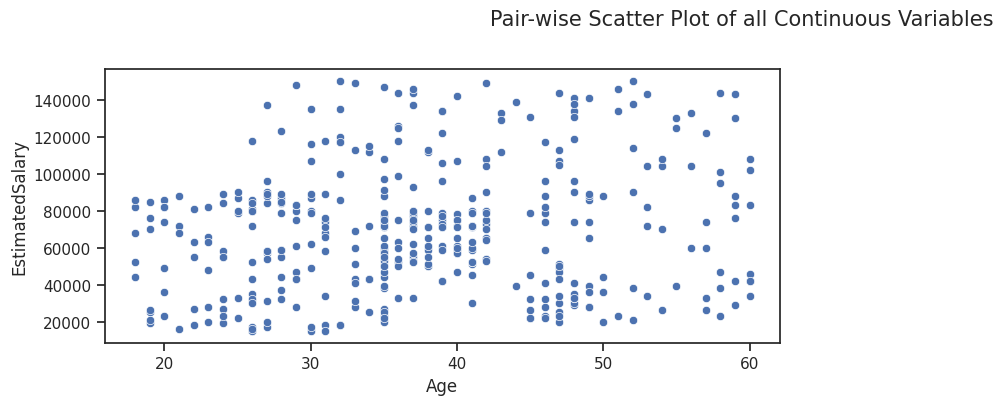

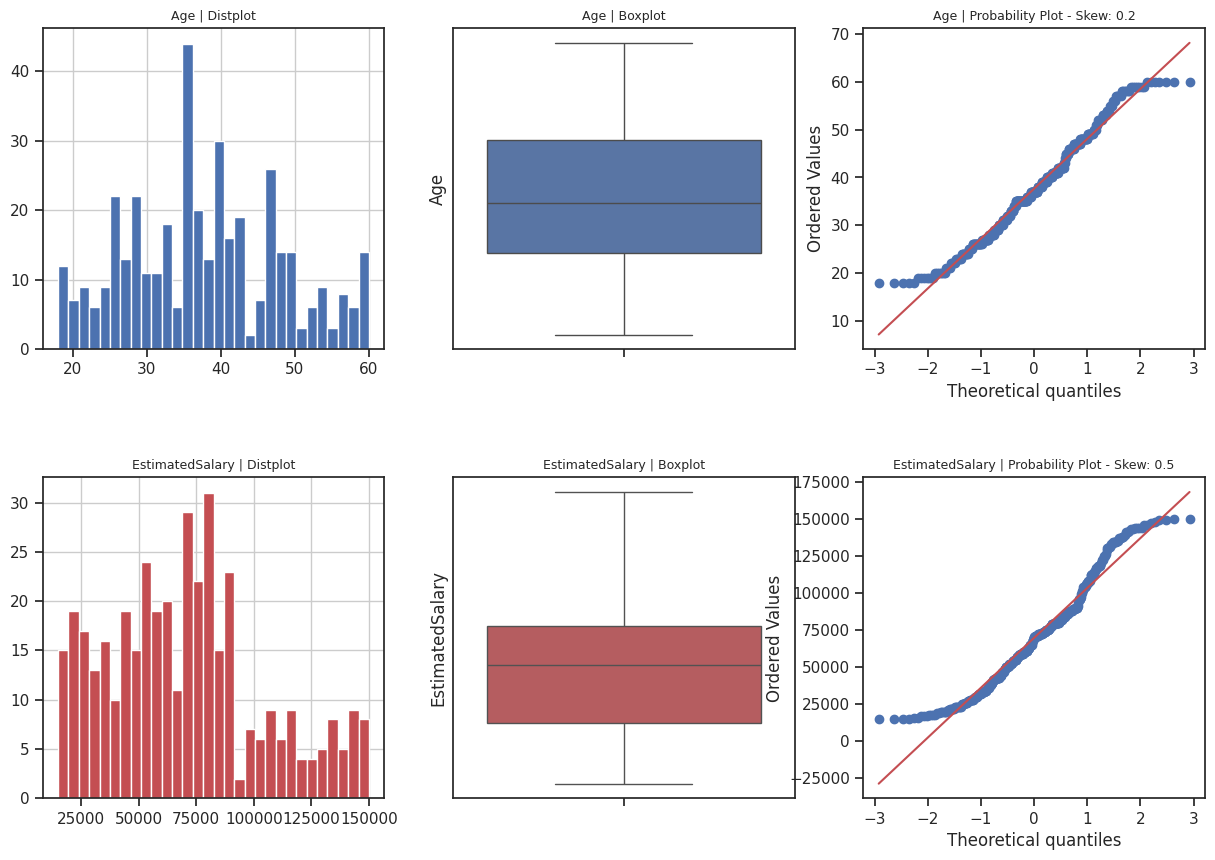

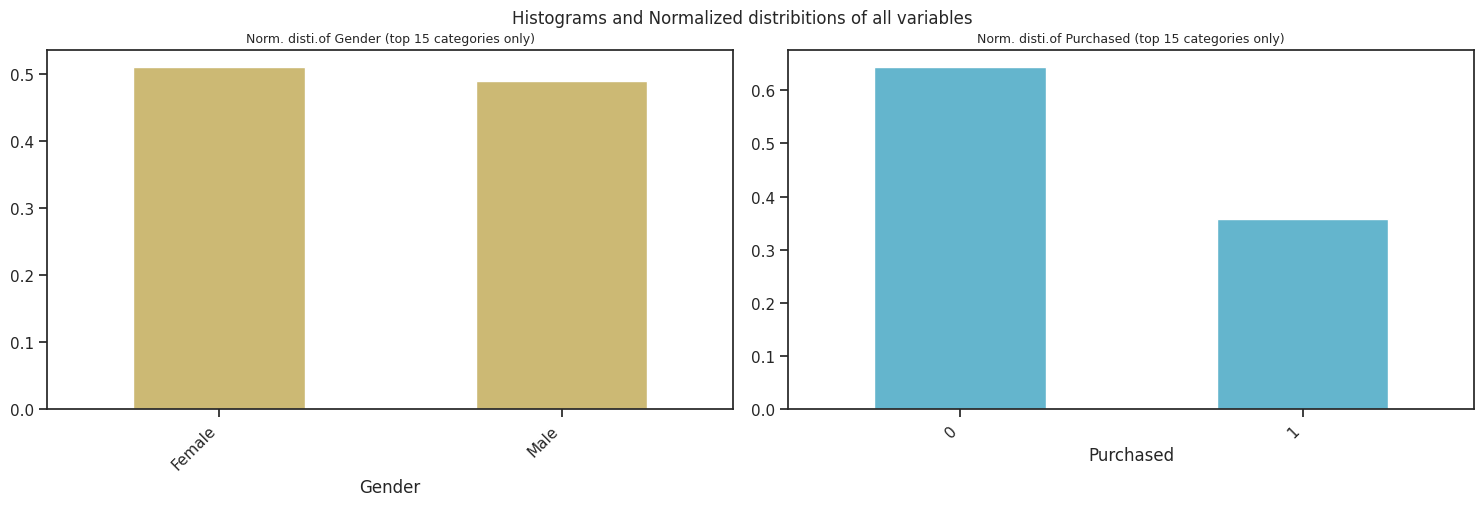

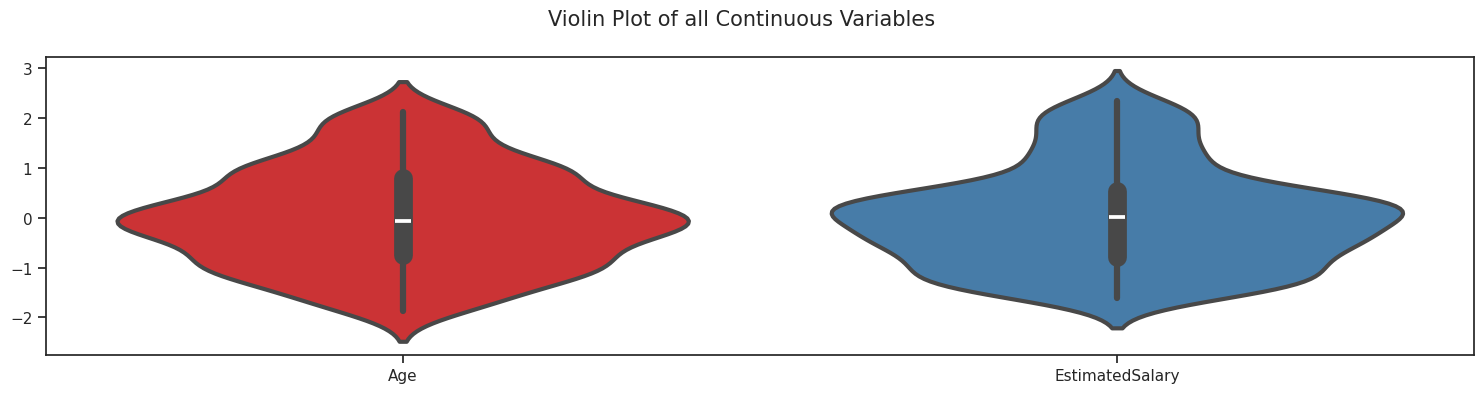

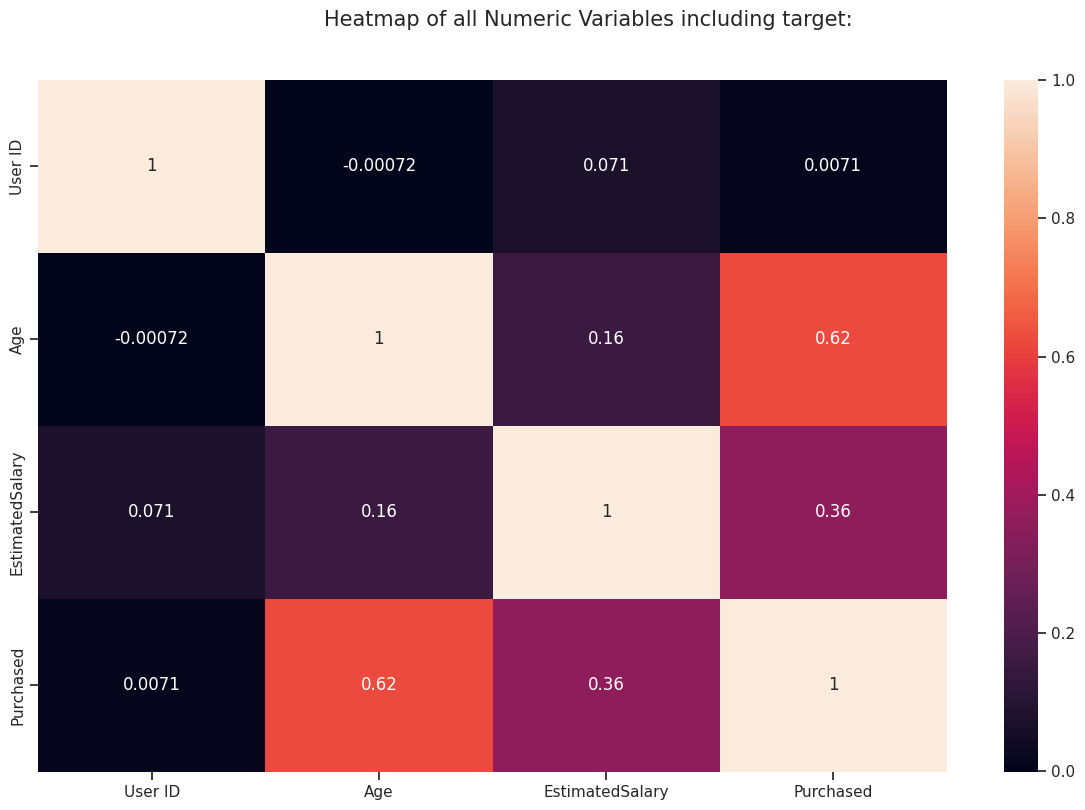

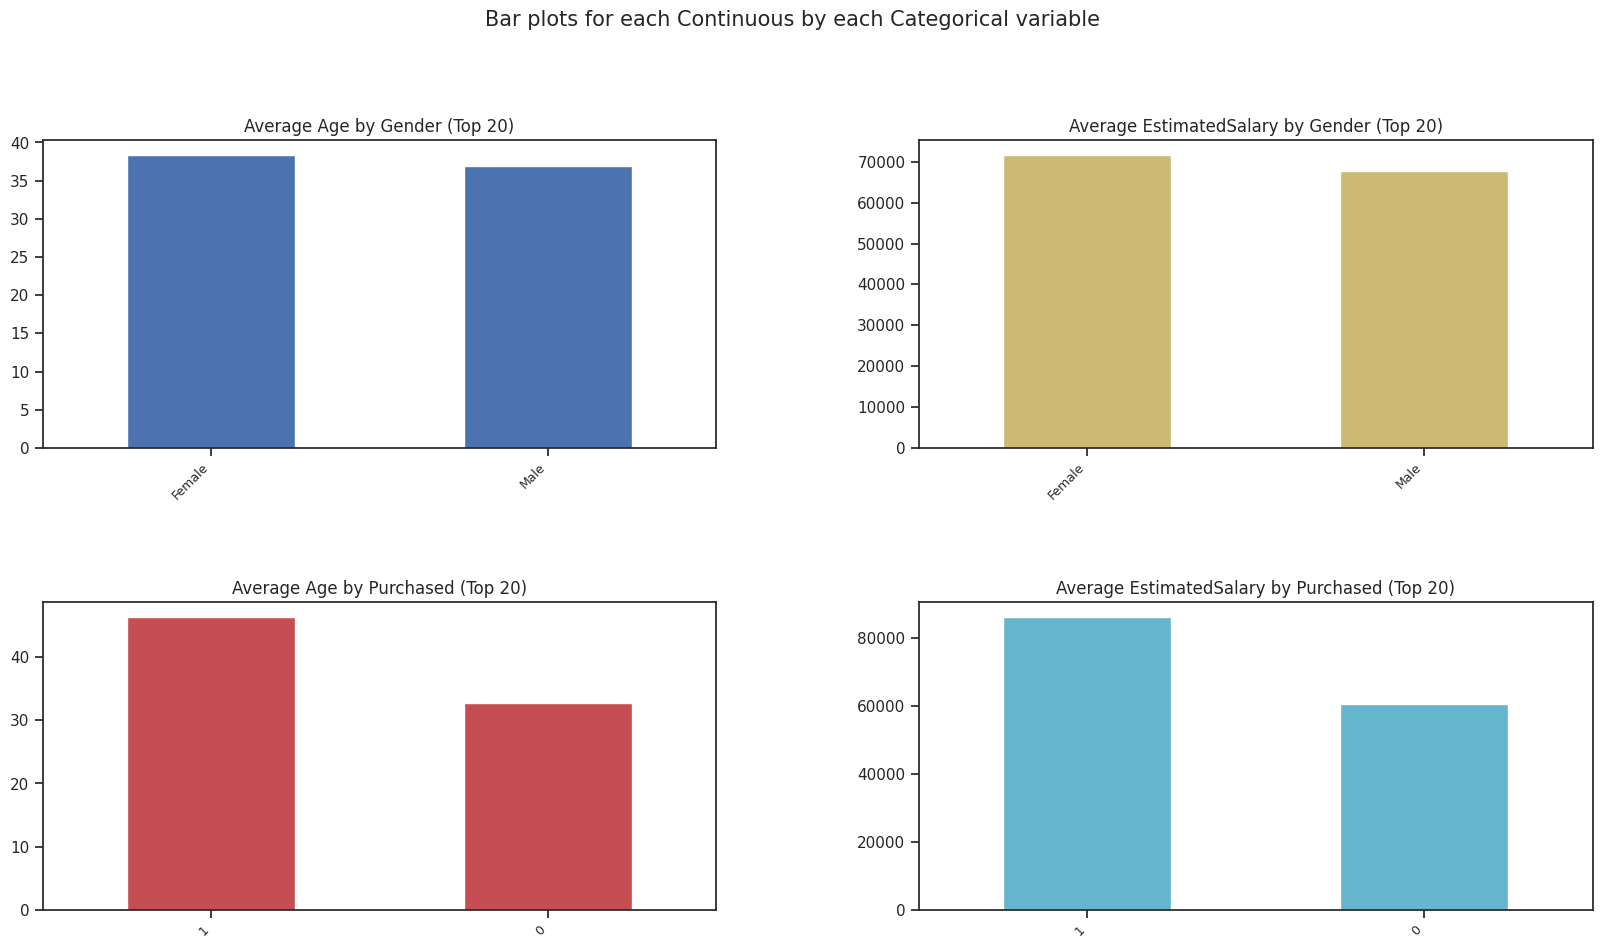

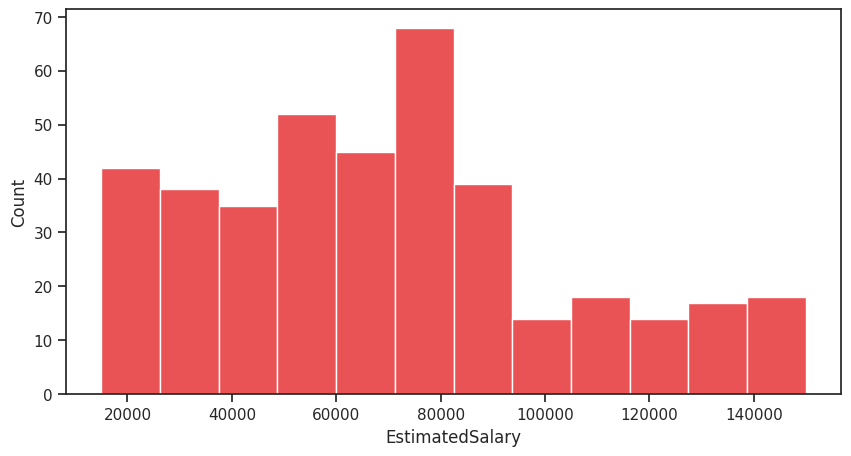

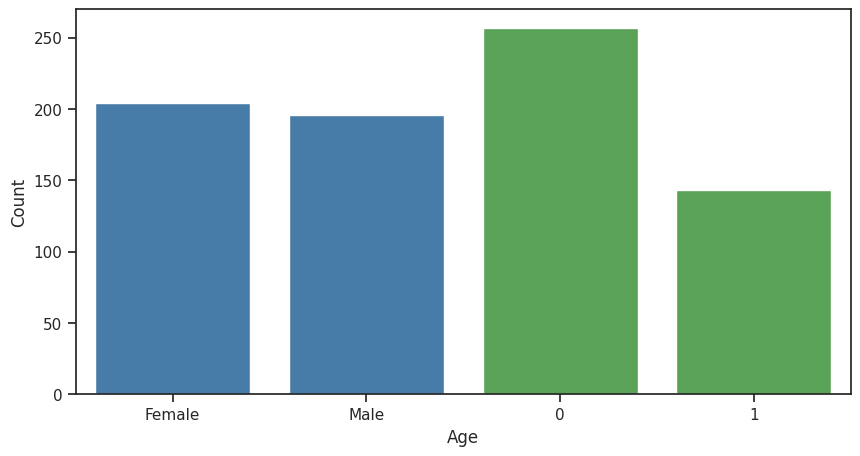

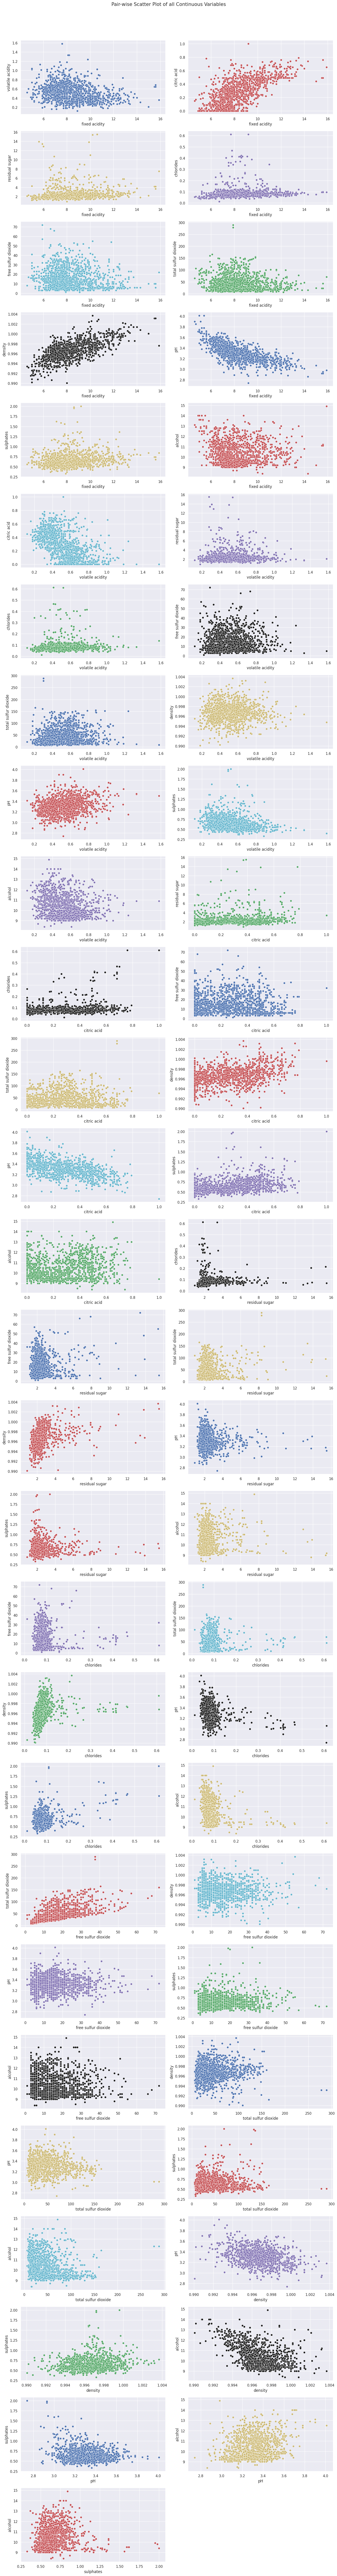

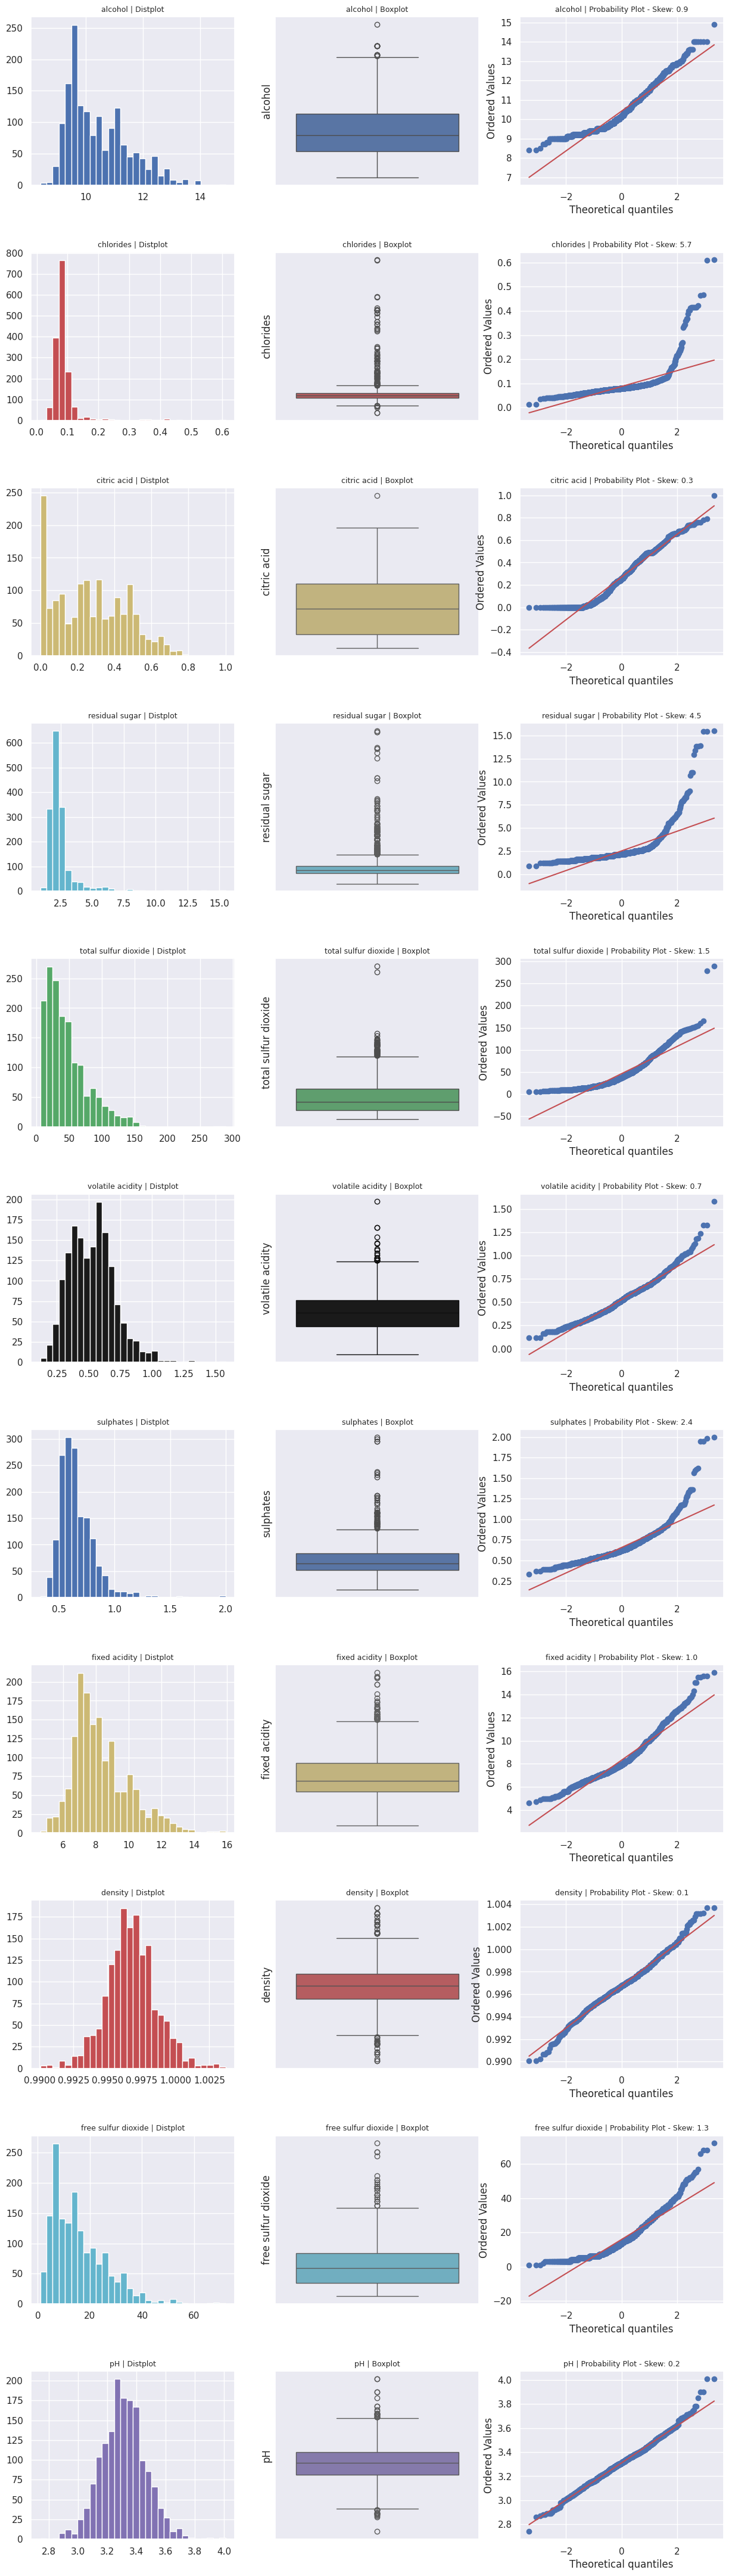

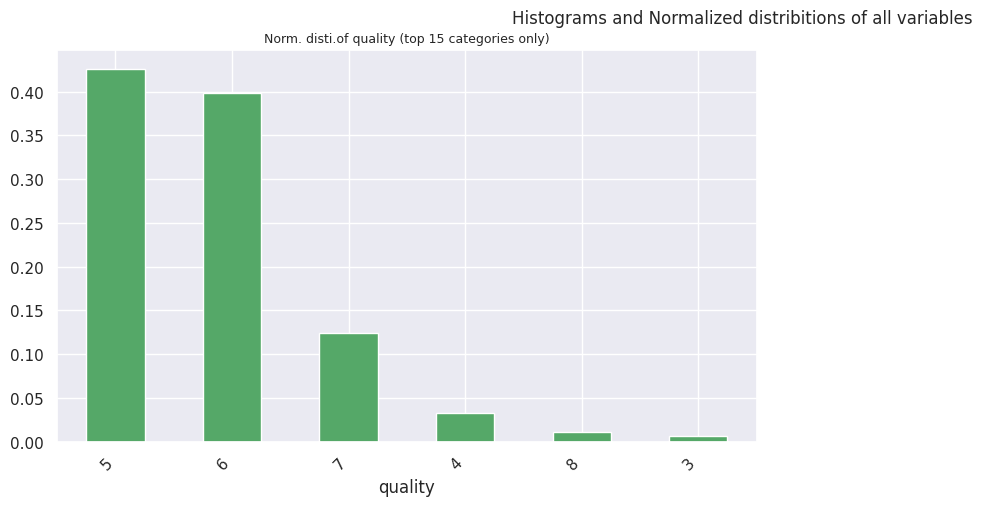

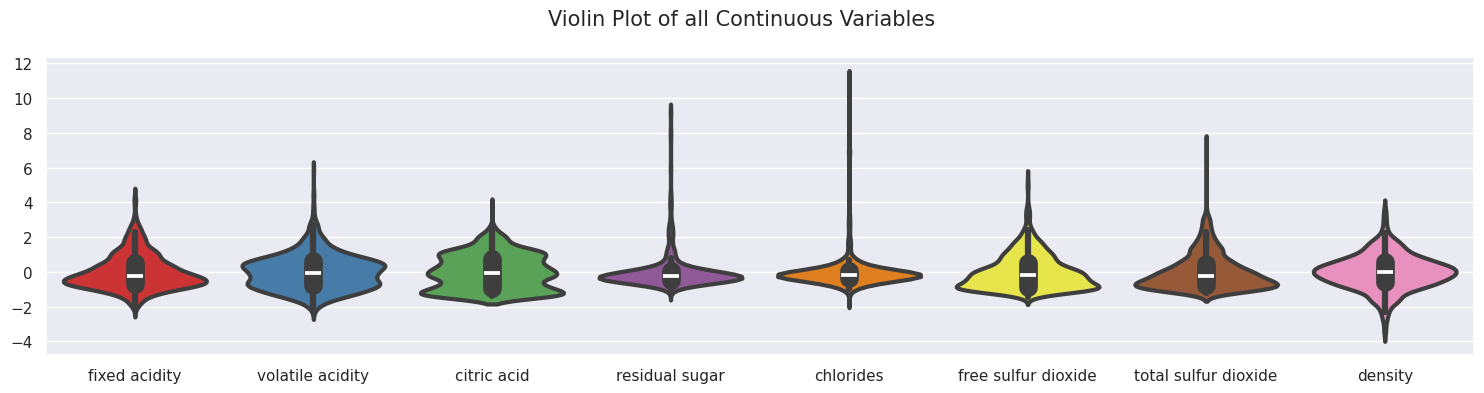

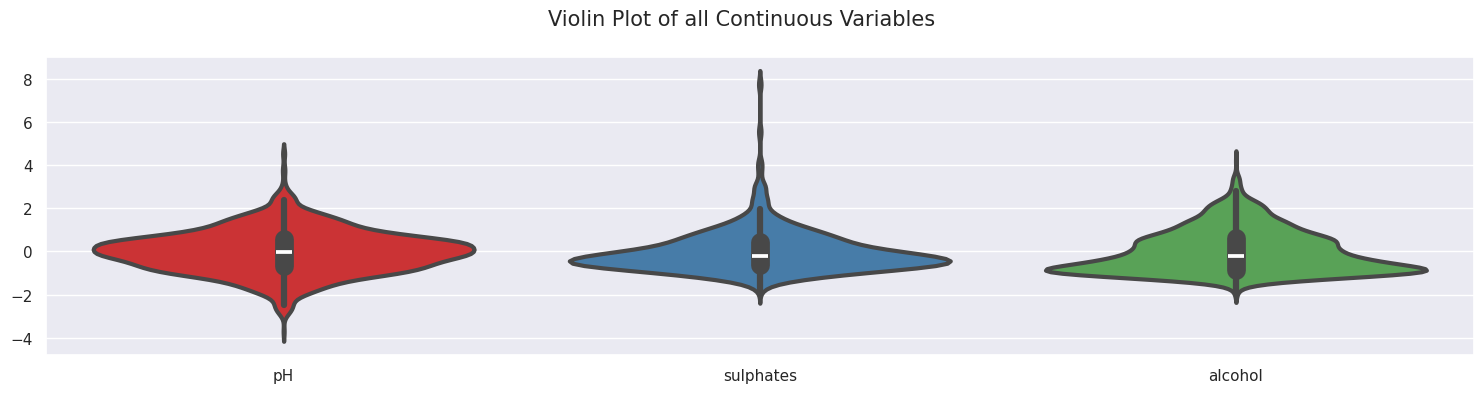

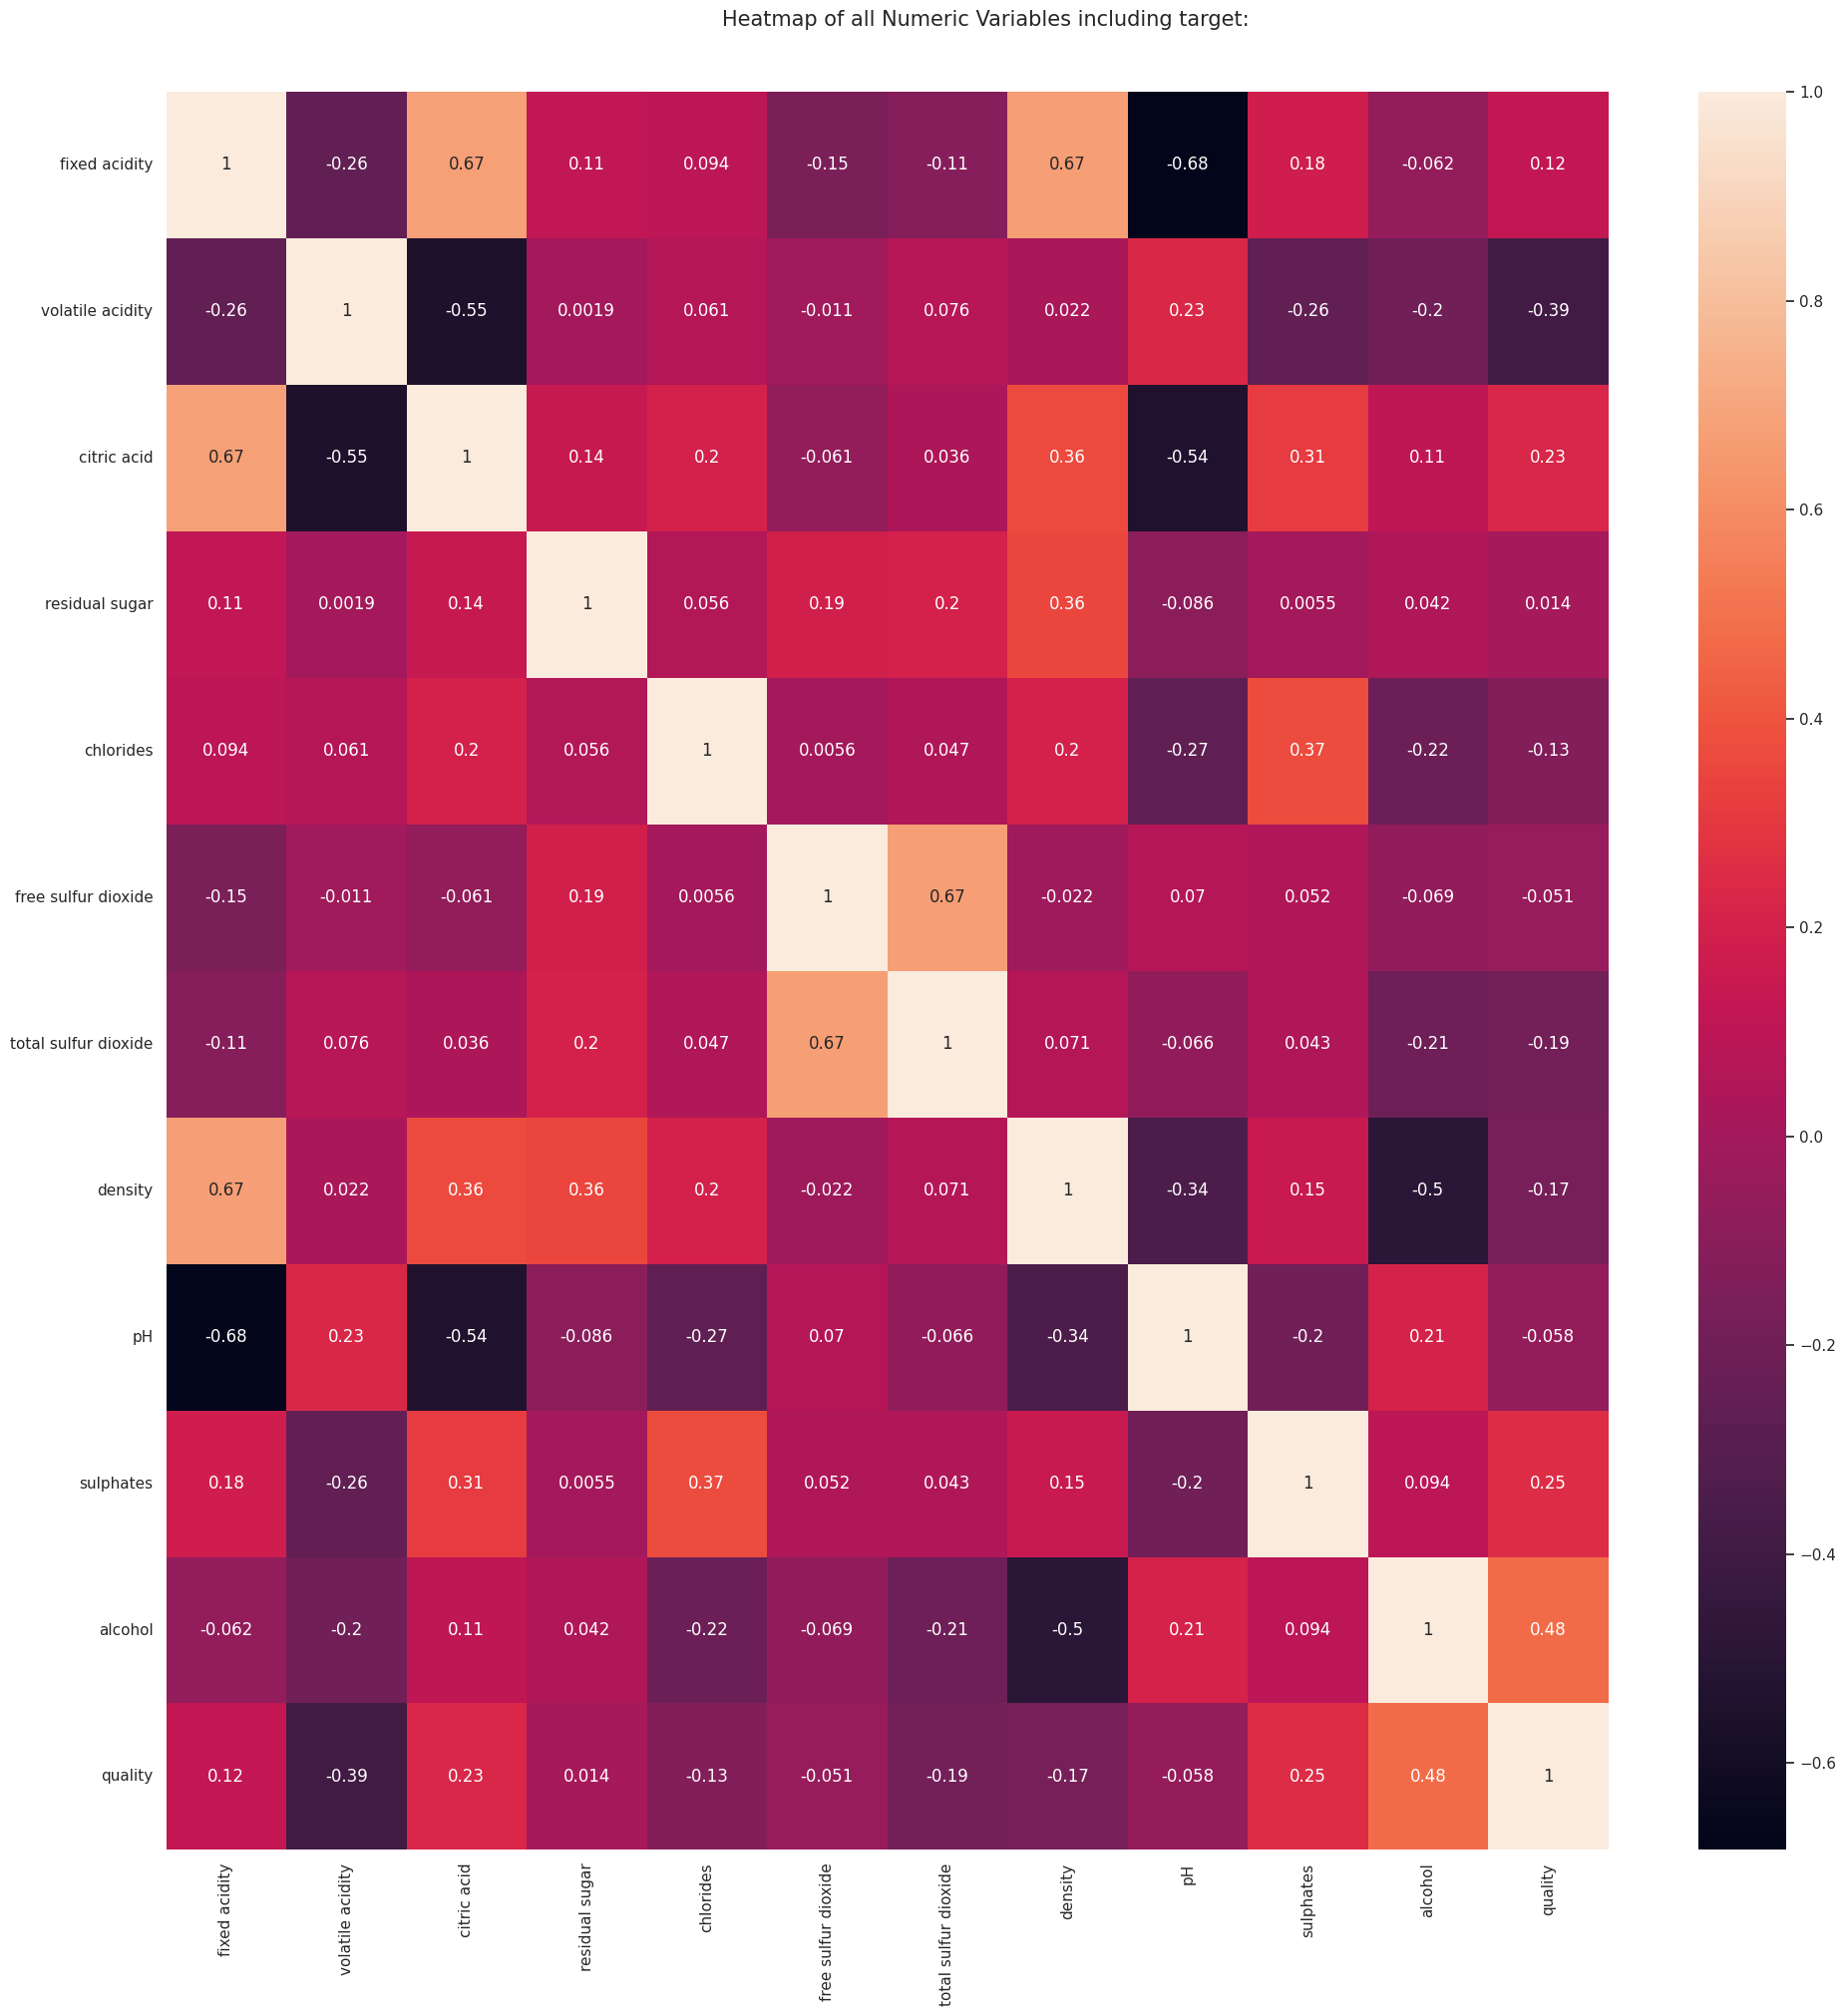

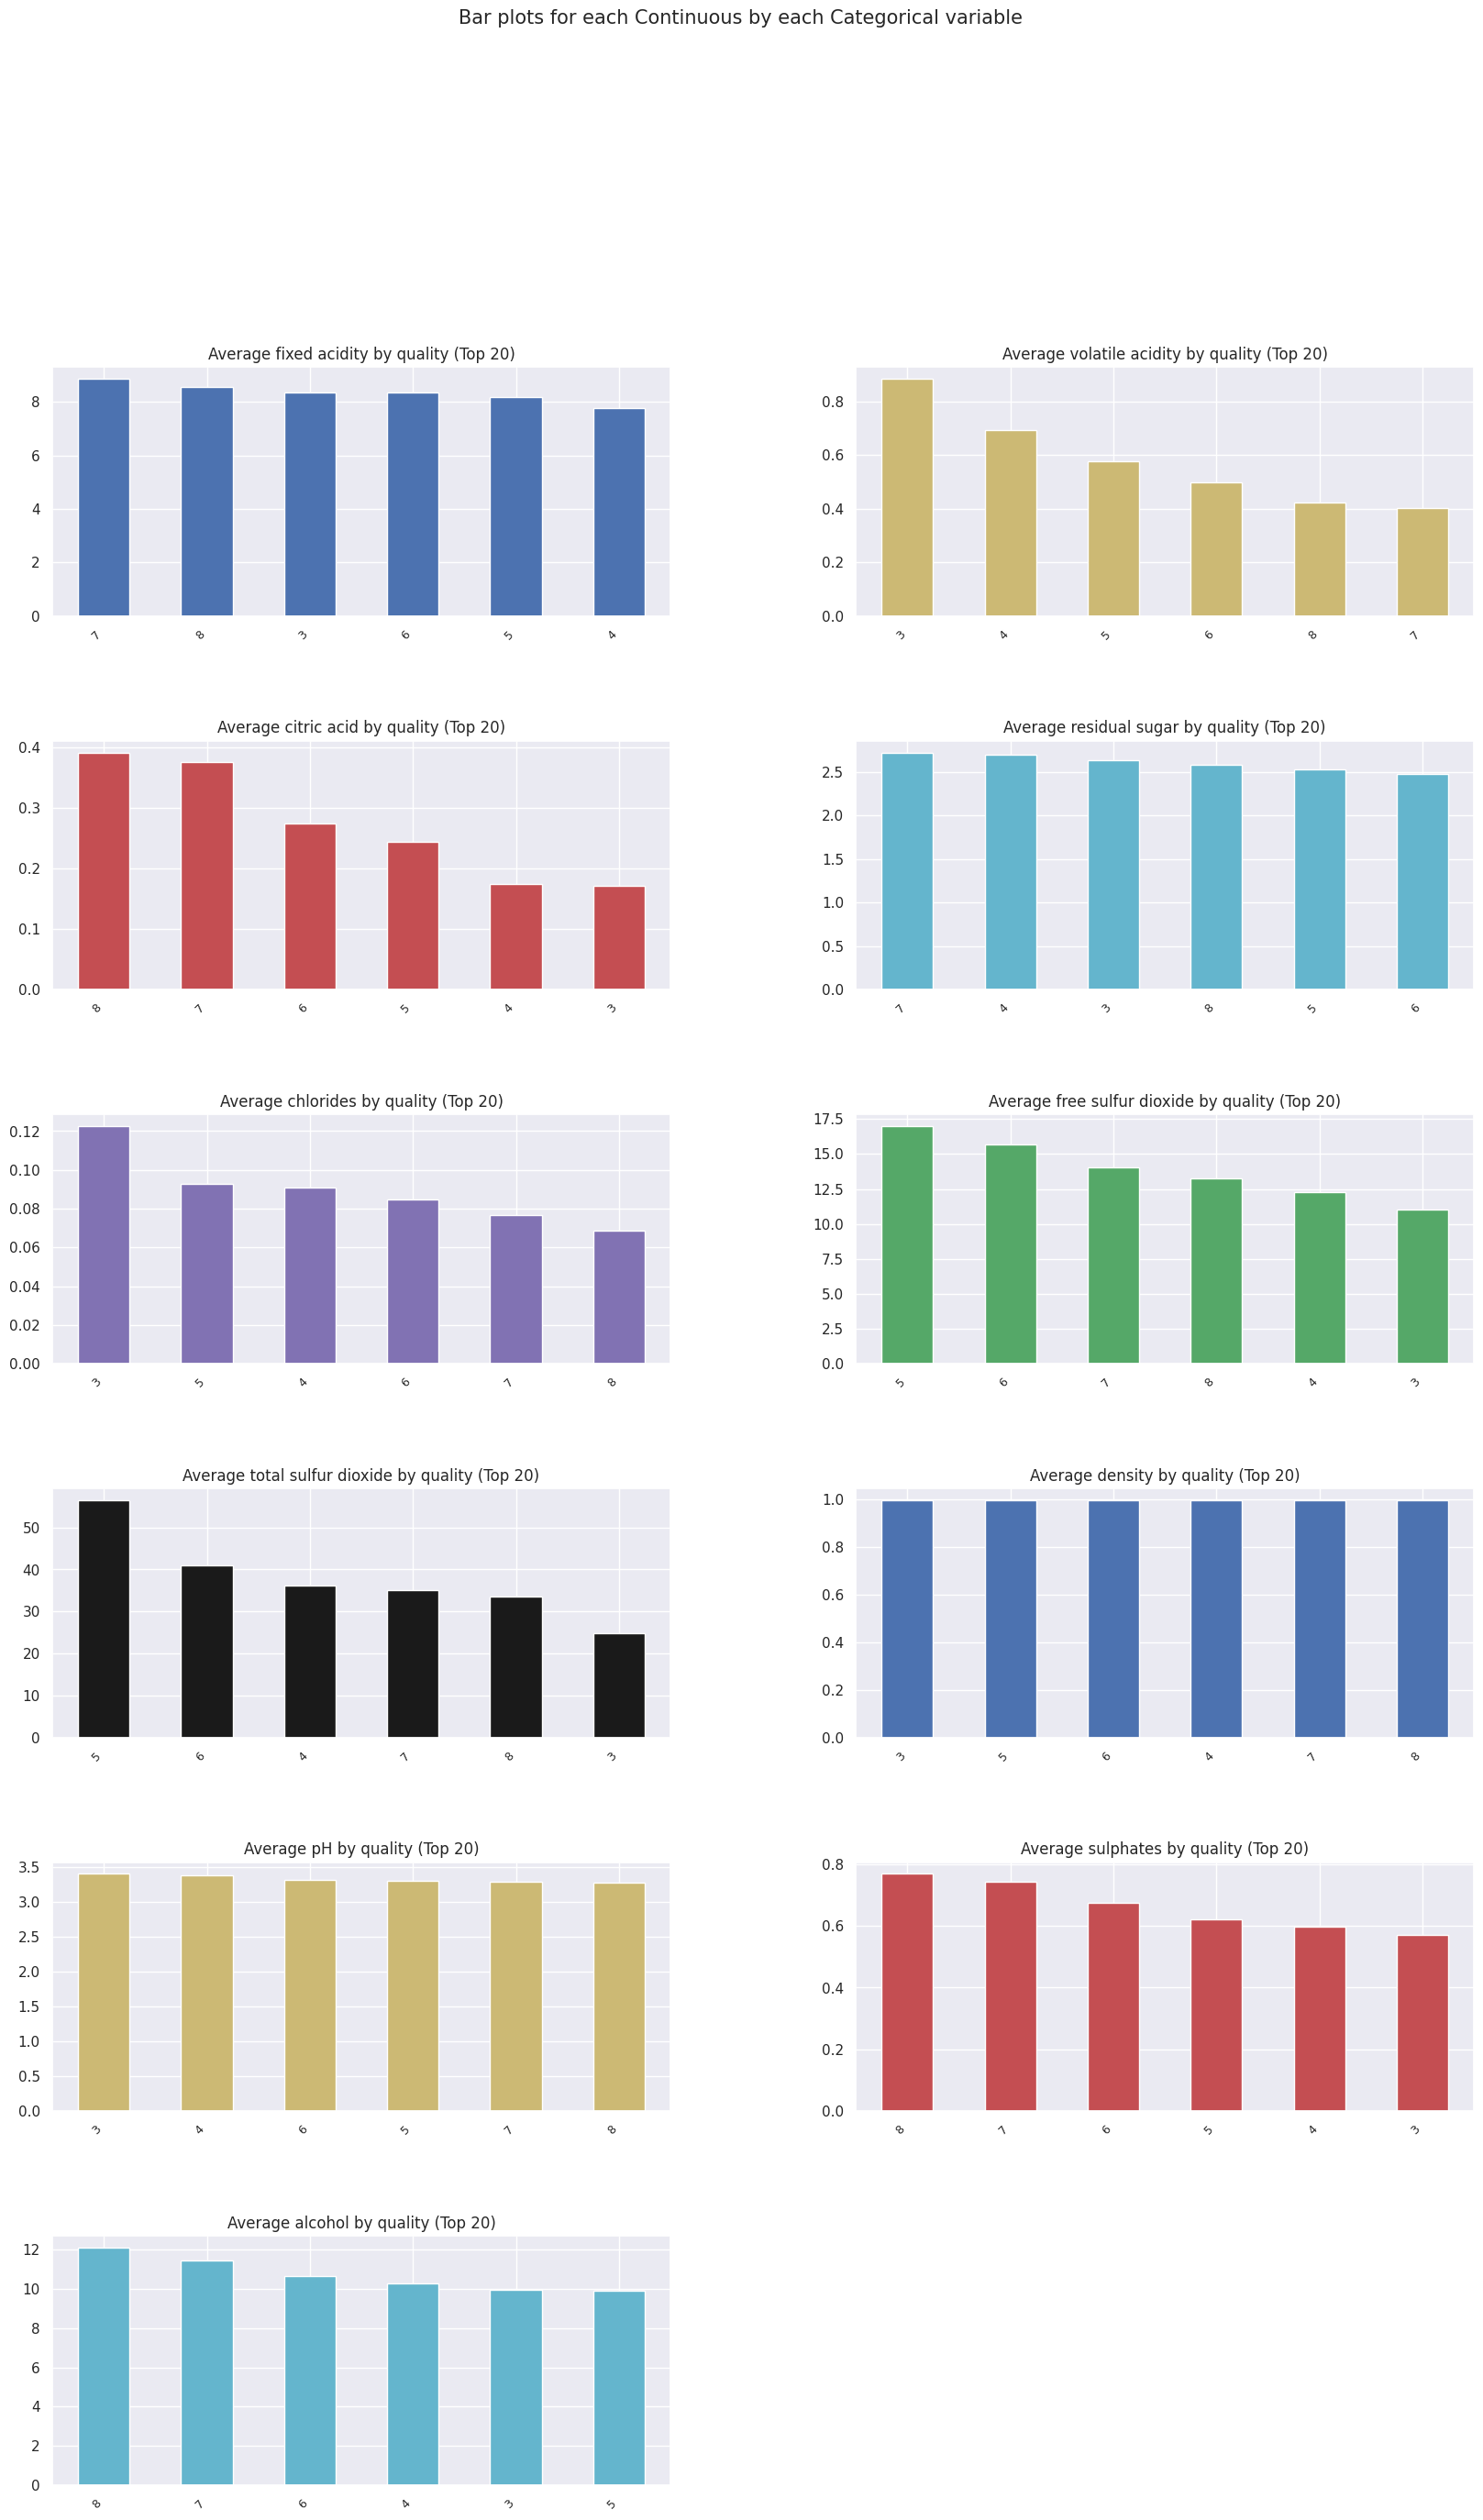

All Plots done
Time to run AutoViz = 36 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [52]:
# Graphical Analysis

autoviz_report = AV.AutoViz('winequality-red.csv')